<a href="https://colab.research.google.com/github/Kapil-st/Regression-Analysis-Insurance/blob/main/AI_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is Heading


In [ ]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2024-02-15 02:53:55--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv’

shampoo.csv         100%[===================>]     519  --.-KB/s    in 0s      

2024-02-15 02:53:55 (22.4 MB/s) - ‘shampoo.csv’ saved [519/519]



In [ ]:
file = open("sample_data/mnist_test.csv")

In [ ]:
# look at the hardware configuration of our Colab environment

!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.146
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [ ]:
# check if we have a GPU attached to the runtime

!nvidia-smi

Thu Feb 15 02:56:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# look at the libraries that the Colab environment has access to

!pip list

In [ ]:
# Explore the files in the working directory

!ls

Useful Colab Extensions

In [ ]:
# Mount our Google Drive to our working directory

import os
from google.colab import drive

MOUNTPOINT = "/content/gdrive"
DATADIR = os.path.join(MOUNTPOINT, "MyDrive")
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
# writes directly to google drive

with open(f"{DATADIR}/test.txt", "w") as outfile:
    outfile.write("Hello World!")

In [ ]:
# Read from a file in our Google Drive

with open(f"{DATADIR}/test.txt", "r") as infile:
    file_data = infile.read()
    print(file_data)

Hello World!


In [ ]:
%load_ext google.colab.data_table

In [ ]:
from sklearn.datasets import fetch_openml
X = fetch_openml("diabetes", version=1, as_frame=True, return_X_y=False)["frame"]
X

In [ ]:
%unload_ext google.colab.data_table

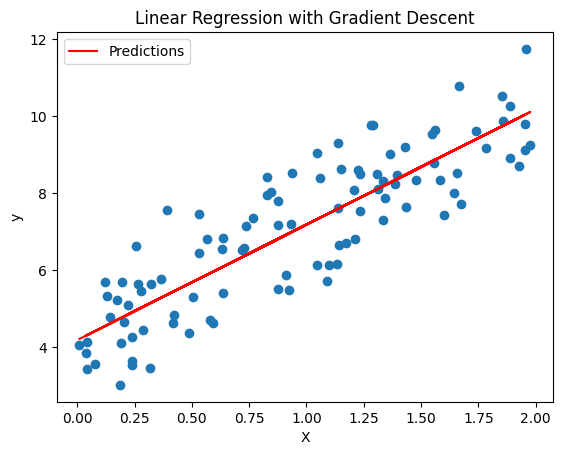

Optimal parameters (theta):
[[4.18679917]
 [2.9998363 ]]


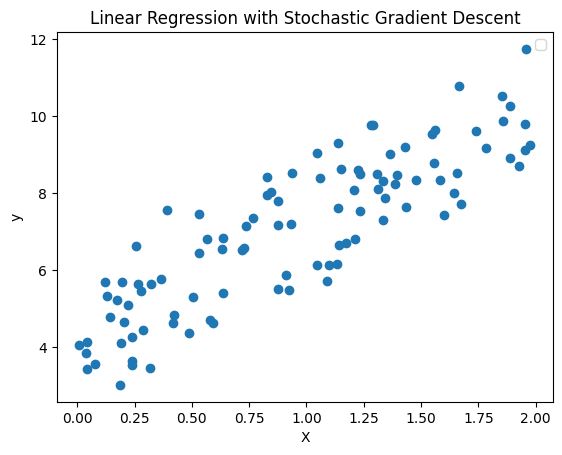

Optimal parameters (theta):
[[6.53886827]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create a DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Batch gradient descent for linear regression
def batch_gradient_descent(X, y, alpha, num_iterations):
    m = len(y)
    theta = np.zeros((2, 1))
    X_b = np.c_[np.ones((m, 1)), X]
    for iteration in range(num_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= alpha * gradients
    return theta

# Set hyperparameters
alpha = 0.01
num_iterations = 1000

# Train the model
theta = batch_gradient_descent(data['X'].values.reshape(-1, 1), data['y'].values.reshape(-1, 1), alpha, num_iterations)

# Plot the data and the linear regression model
plt.scatter(data['X'], data['y'])
plt.plot(data['X'], np.c_[np.ones((100, 1)), data['X'].values.reshape(-1, 1)].dot(theta), color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

print("Optimal parameters (theta):")
print(theta)

# Stochastic gradient descent for linear regression
def stochastic_gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for iteration in range(num_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= alpha * gradients
    return theta

# Set hyperparameters
alpha = 0.01
num_iterations = 1000

# Train the model
theta = stochastic_gradient_descent(data['X'].values.reshape(-1, 1), data['y'].values.reshape(-1, 1), alpha, num_iterations)

# Plot the data and the linear regression model
plt.scatter(data['X'], data['y'])
#plt.plot(data['X'], np.c_[np.ones((100, 1)), data['X'].values.reshape(-1, 1)].dot(theta), color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Stochastic Gradient Descent')
plt.legend()
plt.show()

print("Optimal parameters (theta):")
print(theta)

In [ ]:
import numpy as np
import pandas as pd

# Generate sample data with 3 input variables and 1 output variable
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X3 = 4 * np.random.rand(100, 1)
y = 4 + 3*X1 + 2*X2 + 5*X3 + np.random.randn(100, 1)

# Create a DataFrame
data = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'X3': X3.flatten(), 'y': y.flatten()})

# Linear regression with batch gradient descent
def batch_gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros((4, 1))
    X_b = np.c_[np.ones((m, 1)), X]
    for iteration in range(num_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= alpha * gradients
    return theta

# Linear regression with stochastic gradient descent
def stochastic_gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for iteration in range(num_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= alpha * gradients
    return theta

# Linear regression with mini-batch gradient descent
def mini_batch_gradient_descent(X, y, alpha, batch_size, num_iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for iteration in range(num_iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            gradients = 2/batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= alpha * gradients
    return theta

# Split features and target variable
X = data[['X1', 'X2', 'X3']].values
y = data['y'].values.reshape(-1, 1)

# Set hyperparameters
alpha = 0.01
num_iterations = 1000
batch_size = 10

# Train the models
theta_batch = batch_gradient_descent(X, y, alpha, num_iterations)
theta_stochastic = stochastic_gradient_descent(X, y, alpha, num_iterations)
theta_mini_batch = mini_batch_gradient_descent(X, y, alpha, batch_size, num_iterations)

# Compute the MSE for each model
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_b = np.c_[np.ones((100, 1)), X]
y_pred_batch = X_b.dot(theta_batch)
X_b = np.c_[np.ones((100, 1)), X[:, 1:]]  # Exclude the bias term from X_b
y_pred_stochastic = X_b.dot(theta_stochastic)
y_pred_mini_batch = X_b.dot(theta_mini_batch)

mse_batch = mean_squared_error(y, y_pred_batch)
mse_stochastic = mean_squared_error(y, y_pred_stochastic)
mse_mini_batch = mean_squared_error(y, y_pred_mini_batch)

print("Mean Squared Error (Batch Gradient Descent):", mse_batch)
print("Mean Squared Error (Stochastic Gradient Descent):", mse_stochastic)
print("Mean Squared Error (Mini-Batch Gradient Descent):", mse_mini_batch)


Mean Squared Error (Batch Gradient Descent): 0.8542312474585627
Mean Squared Error (Stochastic Gradient Descent): 5.100042184974268
Mean Squared Error (Mini-Batch Gradient Descent): 4.636126039504876


In [ ]:
theta_batch

array([[3.76991612],
       [2.85782857],
       [1.96717981],
       [5.12307884]])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Generate sample data with 3 input variables and 1 output variable
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X3 = 4 * np.random.rand(100, 1)
y = 4 + 3*X1 + 2*X2 + 5*X3 + np.random.randn(100, 1)

# Create a DataFrame
data = pd.DataFrame({'X1': X1.flatten(), 'X2': X2.flatten(), 'X3': X3.flatten(), 'y': y.flatten()})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['X1', 'X2', 'X3']])

# Split features and target variable
y = data['y'].values.reshape(-1, 1)

# Set hyperparameters
alpha = 0.01
num_iterations = 1000
batch_size = 10

# Define the gradient descent algorithms (using the corrected versions)
theta_batch = batch_gradient_descent(X_scaled, y, alpha, num_iterations)
theta_stochastic = stochastic_gradient_descent(X_scaled, y, alpha, num_iterations)
theta_mini_batch = mini_batch_gradient_descent(X_scaled, y, alpha, batch_size, num_iterations)

# Compute the MSE for each model
X_b = np.c_[np.ones((100, 1)), X_scaled]
y_pred_batch = X_b.dot(theta_batch)
X_b = np.c_[np.ones((100, 1)), X[:, 1:]]  # Exclude the bias term from X_b
y_pred_stochastic = X_b.dot(theta_stochastic)
y_pred_mini_batch = X_b.dot(theta_mini_batch)

mse_batch = mean_squared_error(y, y_pred_batch)
mse_stochastic = mean_squared_error(y, y_pred_stochastic)
mse_mini_batch = mean_squared_error(y, y_pred_mini_batch)

print("Mean Squared Error (Batch Gradient Descent):", mse_batch)
print("Mean Squared Error (Stochastic Gradient Descent):", mse_stochastic)
print("Mean Squared Error (Mini-Batch Gradient Descent):", mse_mini_batch)


Mean Squared Error (Batch Gradient Descent): 0.8365287716025956
Mean Squared Error (Stochastic Gradient Descent): 139.95661390599153
Mean Squared Error (Mini-Batch Gradient Descent): 22.31075830000421


In [ ]:
theta_batch

array([[20.06558249],
       [ 1.56725854],
       [ 1.54568791],
       [ 6.10839602]])